In [2]:
import numpy as np 


0.8323071837323102


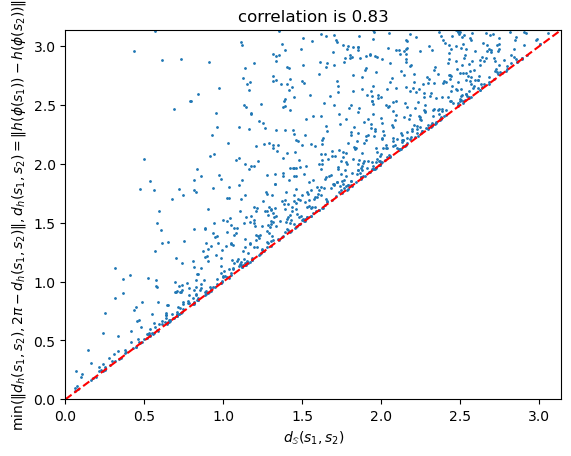

In [17]:
def h_phi(s):
    # input: s n*d array 
    n,d=s.shape
    angle_s_s0=np.arccos(-s[:,-1]).reshape(n,1)
    s_1d=s[:,:-1]
    s_1d_norm=np.sqrt(np.sum(s_1d**2,1)).reshape(n,1)
    return angle_s_s0*s_1d/s_1d_norm

def d_S(s1,s2):
    # input: 
    return np.arccos(np.sum(s1*s2,1))


# generate points in S^2 
def generate_sphere_point(n,d):
    s=np.random.normal(size=(n,d))
    s_norm=np.sqrt(np.sum((s**2),1)).reshape(n,1)
    return s/s_norm

def d_h(s1,s2):
    h1=h_phi(s1)
    h2=h_phi(s2)
    dist1=np.sqrt(np.sum((h1-h2)**2,1))
    dist2=2*np.pi-dist1
    return np.minimum(dist1,dist2)

n=1000
d=3

s1=generate_sphere_point(n,d)
s2=generate_sphere_point(n,d)

d_S_12=d_S(s1,s2)
d_h_12=d_h(s1,s2)
coff=np.corrcoef(d_S_12,d_h_12)[0,1]
print(coff)
X=np.stack((d_S_12, d_h_12), axis=-1)
import numpy as np
import matplotlib.pyplot as plt


# Scatter plot
plt.scatter(X[:,0], X[:,1],s=1.0)

# Drawing the line y = x
plt.plot([0, np.pi], [0, np.pi], 'r--')  # red dashed line

# Setting the range of x-axis and y-axis
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)

# Adding labels
plt.xlabel(r'$d_\mathbb{S}(s_1,s_2)$')
plt.ylabel(r'$d_h(s_1,s_2)$')

plt.title('correlation is %.2f'%(coff))

# Display the plot
plt.show()



In [62]:
h1=h_phi(s1)
h2=h_phi(s2)
dist1=np.sqrt(np.sum((h1-h2)**2,1))
dist2=2*np.pi-dist1

s1**2

In [30]:
np.sum(s1**2,1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])